Importing packages

In [1]:
import gensim
from gensim.corpora import Dictionary
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
import math
import spacy
from spacy.lang.hu.stop_words import STOP_WORDS
from spacy.lang.hu import Hungarian
nlp=Hungarian()

Downloading and loading Hungarian Stop Word and Lemmatizer dictionary

In [2]:
hu = spacy.load('hu_core_news_lg')
stopwords = hu.Defaults.stop_words

Entering collected sample article data

In [3]:
article_data = [{'title': 'Változás az iskolákban: érkeznek a gerincvédő székek',
                'author': 'Nagy Bálint',
                'tags': ['BELFÖLD'],
                'facebook_activity': '600',
                'article_text': 'Változás lép életbe az iskolákban július 1-től: új iskolai szék vásárlásakor már csak gerincvédő székeket lehet beszerezni – írja a Magyar Nemzet az Országos Gerincgyógyászat Központ közleménye alapján. Az erről szóló tájékoztatást a Belügyminisztérium és az Oktatási Hivatal elküldte az iskolafenntartóknak és igazgatóknak is. Azt írták, hogy a tanulók egészségének védelme népegészségügyi, pedagógiai és össztársadalmi cél, a sok ülés miatt pedig fontos, hogy a szék segítse a helyes ülést.  A minisztérium ezzel az Országos Gerincgyógyászati Központ kezdeményezését támogatja. Ajánlásuk alapján azt kérik, hogy amikor tanulói székeket vásárolnak az iskoláknak, az Oktatási Hivatal honlapján az oktatási intézmények kötelező felszereléseiről szóló módosított jegyzékben közzétett új méreteknek megfelelő, gerincvédelmet biztosító tanulói székeket szerezzék be. A döntésről a Magyar Nemzetnek Somhegyi Annamária reumatológus azt mondta: ezzel a lépéssel közelebb kerültünk ahhoz, hogy a hazánkat is sújtó porckopásos gerincbetegségeket visszaszorítsuk. „Azért fontos, hogy a gyerekek gerincvédő székeken üljenek, mert így a derekukat a szék támlája meg tudja támasztani, ez pedig az ülés által a porckorongokra gyakorolt többletnyomást csökkenti. Ha mozgásszervi szakember vizsgálja meg az iskolások gerincét, akár 80 százalékuknál is eltérést talál, s ennek túlnyomó részét szintén a tartási rendellenességek képezik” – fogalmazott.'
                },
                {'title': 'Némítást, fideszes-tiszás szócsatát is hozott a közösségi médiáról szóló EP-vita',
                'author': 'Márton Balázs',
                'tags': ['KÜLFÖLD'],
                'facebook_activity': '1205',
                'article_text': 'A demokráciák egyre nagyobb kihívással néznek szembe a külföldi beavatkozás miatt, például amit Ukrajna ellen láttak Oroszországtól a Facebookon és az Instagramon vagy a román elnökválasztásnál a TikTokon, figyelmeztetett Henna Virkkunen kedden. A technológiai önrendelkezésért felelős uniós biztos az Európai Parlamentben (EP-ben) úgy vélte, az EU-é a legerősebb jogi keret a közösségi oldalakról. A digitális szolgáltatásokról szóló rendelet (DSA) világos kötelezettségeket szab rájuk, fel kell mérniük a kockázatokat és átláthatónak kell lenniük. Hangsúlyozta, hogy a jogszabály nem cenzúrázza a tartalmakat, csak azt, ami offline is jogellenes, például a gyűlöletbeszédet, az így megjelölt tartalmakat 24 órán belül meg kell vizsgálni és ha kell, eltávolítani. A Donald Trumphoz közel álló Elon Musk felkavarta az indulatokat az EP-ben, mióta elkezdett élénken foglalkozni az európai politikával. A testület első 2025-ös ülésére baloldali frakciók kezdeményeztek vitát a közösségi oldalakról és a DSA betartatásáról, míg túlnyomórészt jobboldali képviselők meghívnák Muskot az EP-be, a fideszesek frakciója pedig azt vizsgálná, mit cenzúrázott az épp a Musk-féle X moderációs módszeréhez igazodó Facebook.  Az X tulajdonosa a szélsőjobb hangosbemondója lett a szocialisták frakcióvezetője, Iratxe García Pérez szerint, aki azt kérdezte Virkkunentől, mit tesz az Európai Bizottság a „digitális oligarchák” ellen. A szólásszabadság nem jelenti az álhírek terjesztésének szabadságát, a történelem megmutatta már a propaganda terjedésének veszélyeit. A Metát vezető Mark Zuckerbergék sem állnak a jog felett, figyelmeztetett a többek között DK-s képviselők EP-frakcióját elnöklő politikus. Az a gyanúm, a baloldal minden szinten kezd beleőrülni, hogy elveszítette a „fojtogató ellenőrzést” a politikai vita felett a közösségi médiában, jelentette ki az euroszkeptikus ECR frakcióból Nicola Procaccini. Úgy gondolták, nem helyes, hogy az X leállította Trump fiókját, Ali Hámeneiét (Iráni legfelső vallási vezetőjét) viszont nem. A hangulatot mutatja, hogy Milan Uhrikkal a (Mi Hazánkat is sorai közt tudó) Szuverén Nemzetek Európájából a beszéde elején összeszólalkozott több képviselő, arra kérte őket, fogják be, mire megvonták tőle a szót. A független Fidiasz Panajotu azt javasolta, hívják meg Muskot és Zuckerberget az EP-be, bár a youtuberből lett képviselő egy kérdésre elismerte, ő személyesen nem találkozott cenzúrával. Zuckerberg vallomást tett, cenzúrázott a demokrata kormány nyomására, de hiába akartak erről vitát, ezt a néppártiak és baloldaliak megakadályozták, jelentette ki Dömötör Csaba. Az Egyesült Államokban elküldik a tényellenőröket, utalt a Meta megváltoztatott moderációs szabályaira, míg az EU-ban nem, és „a cenzúra lehetőségét további jogszabályokba öntenék”. A szintén fideszes Schaller-Baross Ernő úgy vélte, a DSA a mostani formájában politikai cenzúra eszközeként is szolgálhat, ebben a formában meg kell szüntetni és biztosítani a szabad véleménynyilvánítást. A szólásszabadság alapvető jog, de ne mossuk össze az esetleges hamis és félrevezető tartalmak felhangosításával, terjesztésével, hangsúlyozta Dávid Dóra. A Tisza képviselője ezért tartotta aggasztónak, hogy – legutóbb a Metánál – megszüntetik a tényellenőrzést, ami nem cenzúra, Zuckerberg pedig beismerte, hogy így kevesebb rossz dolgot tudnak kiszűrni. A tényellenőrzés megszüntetése károkat okoz a demokráciának, ez különösen aggasztó az olyan országokban, ahol a média nagy részét a kormány irányítja, és rendszeresen félrevezeti közönségét, mint Magyarországon.  László András fideszes képviselő felvetette, hogy Dávidnak a Facebook „vezető jogászaként” „pontosan tudnia kellett arról, mi történik”. Arról kérdezte, „hogyan működtette a Facebook a cenzúragépezetet”, valamint hogyan lehet megtudni, ez kit és mit érintett. Dávid szerint ezt a Metától kell megkérdezni, mert nem vezető jogász volt (a tiszás képviselőcastingra feltöltött önéletrajza szerint jogtanácsosként dolgozott a Metánál 2020-tól), és azzal válaszolt, hogy a kormányközeli sajtótermékek több száz helyreigazítási pert veszítettek el, az ügyek közel kétharmadában elmarasztalták ezeket. Címlapkép: Alexis Haulot / Európai Parlament / Európai Unió'
                },
                {'title': 'Karácsony Gergely: Kiderült, hogy elővásárlási jogunk van Rákosrendezőre, amivel élni fogunk',
                'author': 'Nagy Bálint',
                'tags': ['BELFÖLD', 'GAZDASÁG'],
                'facebook_activity': '3981',
                'article_text': '''„A mini-Dubaj beruházás szerződésének tanulmányozásakor találtunk egy érdekességet: a Fővárosi Önkormányzat cégének elővásárlási joga van a területre, amivel élni fogunk” – mondta Karácsony Gergely főpolgármester. Ezt abból a pénzből fogják finanszírozni, amit a kormány visszautal nekik, miután a bíróság a fővárosnak adott igazat a kormány önkormányzatokra kivetett sarca, a szolidaritási hozzájárulás ellen indított elhúzódó perben. Karácsony azzal kezdte, hogy két jó híre van: az egyik, hogy a Fővárosi Törvényszék törvénytelennek nevezte az állami inkasszálást a főváros számlájáról. Szerinte a bíróság ezzel megerősítette a 2023-as döntését, amiben kimondták, hogy a szolidaritási hozzájárulás ebben a formában törvényellenes. „Nagyon vártuk már a bírósági döntést, ami a 2023-as évre vonatkozik” – mondta, hozzátette, hogy elindítottak egy pert 2024-re vonatkozóan is.  „Az államkincstár számláján van 28,3 milliárd forint, ami a Fővárosi Önkormányzatot illeti. Azt várjuk, hogy ezt a pénzt a bírósági ítélet írásos kihirdetése után az államkincstár visszautalja” – mondta a főpolgármester. Ha ez nem történik meg, akkor kártérítési pert indítanak, és biztosak benne, hogy nyerni fognak. A '24-es évvel kapcsolatban hasonló döntést várnak, ott már 40 milliárd forint a tét. „Itt kell még néhány hónap, hogy megnyerjük ezt a pert.” A másik hír a Rákosrendezővel, a mini-Dubaj beruházással kapcsolatos. Karácsony hétfőn követelte a szerződés nyilvánosságra hozatalát, ami kedden meg is történt. Ennek tanulmányozáskor találtak egy érdekességet: a Fővárosi Önkormányzat cégének, a Budapesti Közműveknek elővásárlási joga van a teljes területre. Karácsony szerint ez azért van így, mert a főváros kicsi részben, de résztulajdonos ezen a területen. A mini-Dubaj szerződés hatályba lépésének a feltétele, hogy az elővásárlási joggal rendelkezők lemondjanak erről a jogról. „Eszünk ágában sincs lemondani az elővásárlási jogról, éppen most kerestünk a fővárosnak 28 milliárd forintot, mi mást tehetnénk, visszavásároljuk Rákosrendező területét” – mondta Karácsony. A főpolgármester azt mondta, hogy a területért járó összeget a szerződés szerint 2039-ig kell kifizetnie az új tulajdonosnak. Az ütemezés szerint 10 munkanapon belül kell kifizetni az első részletet, és 2039-ig az utolsót. Az első részlet 12,7 milliárd forint, amit a szerződés életébe lépése után legkésőbb 10 napig lehet befizetni. A Fővárosi Közgyűlés januári ülésére egy előterjesztést nyújt be a főpolgármester, amiben felhatalmazhatják majd a Budapesti Közműveket, hogy éljen az elővásárlási jogával és fizesse ki az első részletet. A következő részletet akkor kell kifizetni, mikor az állam elvégezte a feladatát, ami a beruházások elkezdéséhez szükséges. „Nekem az a tervem, hogy amennyiben mi leszünk a tulajdonosok, egy nemzetközi ingatlanhasznosítási pályázat keretében megvalósítjuk azt, amire Budapestnek valóban szüksége van” – mondta Karácsony a terveikről. Nem felhőkarcolókat, hanem parkvárost építenének Rákosrendezőn. A részletekről a napokban tárgyalni fog a fővárosi pártokkal is.  A főpolgármester még hétfőn követelte, hogy hozzák nyilvánosságra a rákosrendezői beruházással kapcsolatos terveket. Ekkor „nettó hazaárulásnak” nevezte Rákosrendező eladását. A szerződéseket kedden nyilvánosságra is hozták, ebből derült ki, hogy a Budapest Közműveknek elővásárlási joga van, amiről eddig nem tudtak. Az NGM még hétfőn közölte, hogy 50,9 milliárd forintért eladták Rákosrendező vasúti használaton kívüli területeit az emírségekbeli Eagle Hills Csoportnak. A világ egyik legnagyobb ingatlanfejlesztőjének számító cég Grand Budapest néven épít új városnegyedet a területen, a hivatalos elnevezés bejelentése előtt mini- és maxi-Dubajként ismertté vált projekt 12 milliárd eurós beruházást jelent. Mohamed Alabbar, a projekt vezetője azt ígéri, „világszínvonalú zöld városrész” jön majd létre az elhagyatott területen. Ezeknek a terveknek tehet akár keresztbe Karácsony bejelentése.  A kedd délután nyilvánosságra hozott szerződésből kiderült, hogy az állam nettó 59\u202f286 forint / négyzetméter áron adta el a terület nagy részét. A szerződés részeként az államnak az utolsó részlet kifizetéséig joga van a terület egy részének visszavásárlásához, amennyiben a szerződés mellékletében megjelölt közlekedési céljaihoz szüksége van az érintett területekre. Ez a gyakorlatban arra vonatkozhat, ha a vasutat bővítik vagy a metrót bevezetik a területre, és azok kicsit belelógnak a most eladott telkekbe. A dokumentumban arra is van térkép, hogy a terület mely részén milyen magas épületeket lehet építeni. A terület két szélső harmadán 250 méter a megengedett legnagyobb magasság, a közepén azonban 500 méter. Azt külön is megnéztük, hogy mi szerepel a szerződésben a főváros elővásárlási jogáról. Karácsony Budapest nehéz költségvetési helyzete miatt még 2023 áprilisában jelentette be a főváros „túlélőcsomagját”. Ennek része volt az is, hogy pert indítottak a közigazgatási bíróságon a Pénzügyminisztérium ellen a szolidaritási hozzájárulás miatt, mert jogi álláspontjuk szerint annak mértéke több, mint amire a törvény lehetőséget ad. Karácsonyék gyakorlatilag azt kifogásolták, hogy nettó befizetői lettek a központi költségvetésnek, azaz több pénzt fizettek be, mint amit az állam normatívaként adott arra, hogy működtessék a közszolgáltatásokat. A per indításakor az Alaptörvényre és az önkormányzati törvényre hivatkoztak, ezek kimondják: az önkormányzatok saját bevételei nem elvonhatók. 2023-ban viszont 24 milliárddal, tavaly 35 milliárddal, idén pedig a tervek szerint 50 milliárd forinttal haladta volna meg a szolidaritási hozzájárulás címen elvont pénz a kormánytól kapott állami támogatást. Budapest 2025-ös költségvetését már úgy fogadták el, hogy úgy számoltak: a bíróság a fővárosnak kedvező döntést hoz, és a 89 milliárdos szolidaritási hozzájárulásból csak 39-et fizetnek be, 50-et pedig nem. Ezzel nullára jön ki a fővárost érő elvonások mértéke, ezzel Karácsony Gergelyék szerint biztosítani tudják Budapest működőképességét. A mostani, a fővárosnak kedvező döntéshez kalandos úton jutottak el. A 2023-ban úgy tűnt, hogy gyorsan eldől a kérdés, ugyanis a bíróság első fokon egy hónap alatt, tárgyalás nélkül elutasította kérelmüket, azonban a főváros másodfokra vitte az ügyet. A Fővárosi Ítélőtábla 2023 szeptemberében a per lefolytatására utasította a Fővárosi Törvényszéket, amely végül az Alkotmánybíróságnak beadott, egyedi normakontrollt kérő beadványában azt írta, „a főváros által csatolt beszámolók és egyéb adatok alapján megállapítható a szolidaritási hozzájárulás ügyében az állami konfiskáló, elkobzó jelleg”. A Törvényszék a március 25-én beadott dokumentumban azt kérte, hogy az Alkotmánybíróság állapítsa meg, a felperest terhelő szolidaritási hozzájárulás elkobzó jellegű, aránytalan, és így nemzetközi szerződésbe ütközik, azt meg kell semmisíteni, illetve rendeljen el egyedi alkalmazási tilalmat a főváros esetében. Az Alkotmánybíróságnak 90 napja volt dönteni, de több mint 200 napig halogatták a kérdést, végül kimondták, hogy nincs túladóztatva a főváros. Karácsonyék viszont az Ab egyik megállapításába kapaszkodhattak: „A szolidaritási hozzájárulás, amikor nettó befizetővé tesz egy helyi önkormányzatot, akkor kerülhet összeütközésbe a Helyi Önkormányzatok Európai Chartában, illetve az Alaptörvényben biztosított önkormányzati pénzügyi autonómiával” – írták. A bíróságnak ezután újabb döntést kellett hoznia a kérdésről. A főváros a per idejére egyébként jogvédelmet is kapott a bíróságtól, így hivatalosan az államkincstár nem vonhatta volna el a szolidaritási hozzájárulást. De hiába tartott a per, az államkincstár rendre vitte a pénzt Budapest számlájáról. Felmerülhet, hogy a főváros éves, 400 milliárd forintos költségvetésében miért számít ennyire 25 vagy akár 50 milliárd forint, miért vitték perre a szolidaritási hozzájárulást. Az utóbbi években Budapest költségvetése mindig nagyon szorosan jön ki, előfordul, hogy egyes bevételek beérkezéséig átmenetileg folyószámlahitelekből finanszírozták a működést, év végén pedig csak faktorálással tudták nullára kihozni a büdzsét (faktoring ügylet lényege, hogy a bankok megelőlegezik az adott cégnek járó pénzt, mivel a fővárosnak éppen nincs likvid forrása az összeg kifizetéséhez). A napi működés finanszírozása mellett – BKK, BKV, közvilágítás stb. – arra már nem marad pénz, hogy saját forrásból nagyobb beruházásokba kezdjenek. Jelenleg Budapest gyakorlatilag összes nagyobb beruházását (például új CAF-villamosok) EU-s pénzből finanszírozzák, újabb projekteket is csak uniós pénzekre alapozva terveznek. Az idei költségvetésbe egyetlen nagyobb beruházást, a Flórián téri felüljáró felújítását tervezték be, kizárólag ezt tudták kigazdálkodni saját pénzből. A kormány eközben nem segíti, hanem a szolidaritási hozzájáruláson keresztül inkább nehezíti Budapest gazdasági helyzetét. Emellett előfordul, hogy az ígért forrásokat csak késve, vagy végül egyáltalán nem adják oda. A Fidesz Karácsony Gergelyen időről időre számonkéri, hogy hova tüntette az elmúlt öt évben a Tarlós István által hátrahagyott, több mint 200 milliárd forintos tartalékot a főváros számlájáról. Erre Karácsonyéknak az a válasza, hogy a kormány elvonásai, illetve a sorozatos válságok (Covid, energiaválság, orosz-ukrán háború) miatt megnövekedett költségek szép lassan felemésztették ezt a pénzt. A közösségi közlekedés forrásigénye például három év alatt 84 milliárd forinttal nőtt. A Fővárosi Önkormányzat Karácsonyék szerint 2025-re eljutott arra szintre, hogy már nem tudnak hol spórolni. Az idei budapesti költségvetés célja egész egyszerűen már az volt, hogy fenntartsák Budapest működőképességét, azaz járjon a villamos, elvigyék a szemetet, működjön a közvilágítás. De ezt saját bevallásuk szerint már csak úgy tudják biztosítani, amennyiben a kormány által kivetett szolidaritási hozzájárulásnak egy részét nem fizetik be. A bíróság friss döntése most ebben támogatja őket.'''
                }
]

Function of text preprocessing (tokenization, filtering out stop words, and lemmatization)

In [4]:
def preprocess(word_list):
    result = []
    for token in word_list:
        token=token.lemma_
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stopwords:
            result.append(token)
    return result

Grouping tokenized texts by topic (tag)

In [5]:
topic_docs = defaultdict(list)
for doc in article_data:
    if doc['tags']:  # Ensure tag exists
        topic = doc['tags'][0]  # Use first tag as topic
        # text = doc['article_text'].lower().split()  # Simple tokenization
        text = preprocess(hu(doc['article_text']))
        topic_docs[topic].append(text)

Generating word frequencies and word cloud for each topic

In [6]:
topic_wordclouds = {}
for topic, tokenized_docs in topic_docs.items():
    dictionary = Dictionary(tokenized_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

    word_freq = {}
    for doc in bow_corpus:
        for word_id, freq in doc:
            word = dictionary[word_id]
            word_freq[word] = word_freq.get(word, 0) + freq

    # Generate WordCloud object (but don't show it yet)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate_from_frequencies(word_freq)

    topic_wordclouds[topic] = wordcloud

Plot all word clouds on one chart

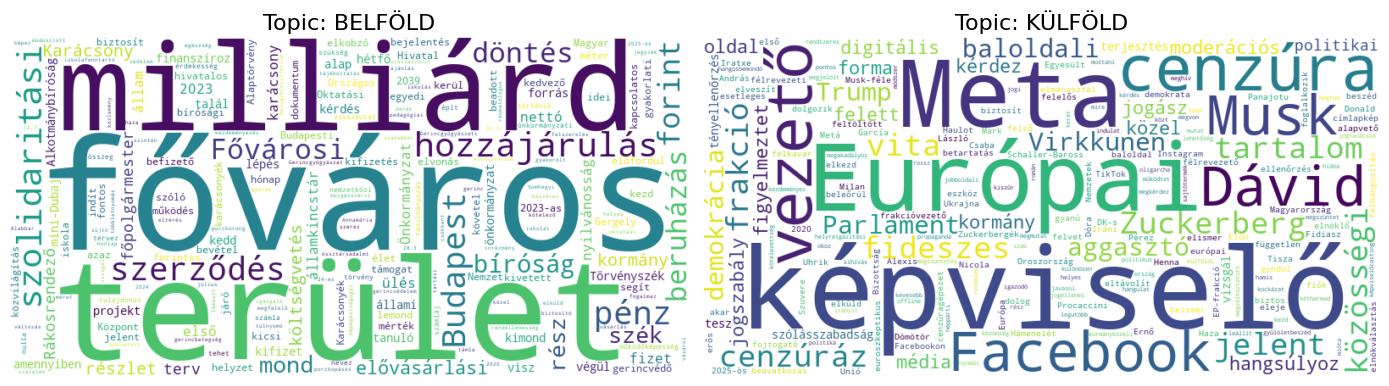

In [7]:
num_topics = len(topic_wordclouds)
cols = 2
rows = math.ceil(num_topics / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
axes = axes.flatten() if num_topics > 1 else [axes]

for i, (topic, wc) in enumerate(topic_wordclouds.items()):
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f'Topic: {topic}', fontsize=16)
    axes[i].axis('off')

# Turn off any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()